In [65]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
import scipy.stats as st
sns.set()

In [66]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [67]:
# Carregando dataset com os alunos de matematica
students_math = pd.read_csv('../databases/student-mat.zip', compression='zip')
students_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [68]:
# Carregando dataset com os alunos de portugues
students_por = pd.read_csv('../databases/student-por.zip', compression='zip')
students_por.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Modelo de previsão com Regressão Logística
Basendo-se nas correlações verificadas entre o consumo de álcool e outros atributos nas demais seções deste trabalho. Utilizamos tais atributos para criar um modelo de previsão desse consumo através de uma regressão logística

In [69]:
# Vamos usar o conjunto dos alunos de matematica como os dados de treino para o modelo

# Primeiramente executamos one hot encoding para os atributos categoricos com entradas em texto
students_math_restrict = pd.get_dummies(students_math[['famrel', 'absences', 'G3', 'Pstatus', 'goout', 'freetime', 'Walc']])

y_treino = students_math_restrict[['Walc']].to_numpy()
y_treino = y_treino.reshape(y_treino.shape[0],)

#
students_math_restrict = students_math_restrict.drop(columns=['Walc'])

X_treino = students_math_restrict.to_numpy()

print(students_math_restrict.columns)
students_math_restrict.head()

Index(['famrel', 'absences', 'G3', 'goout', 'freetime', 'Pstatus_A',
       'Pstatus_T'],
      dtype='object')


,famrel,absences,G3,goout,freetime,Pstatus_A,Pstatus_T
0,4,6,6,4,3,1,0
1,5,4,6,3,3,0,1
2,4,10,10,2,3,0,1
3,3,2,15,2,2,0,1
4,4,4,10,2,3,0,1


In [70]:
# Vamos usar o conjunto dos alunos de portugues como os dados de teste para o modelo

# Primeiramente executamos one hot encoding para os atributos categoricos com entragas em texto
students_por_restrict = pd.get_dummies(students_por[['famrel', 'absences', 'G3', 'Pstatus', 'goout', 'freetime', 'Walc']])

y_pt = students_por_restrict[['Walc']].to_numpy()
y_pt = y_pt.reshape(y_pt.shape[0],)

students_por_restrict = students_por_restrict.drop(columns=['Walc'])

X_pt = students_por_restrict.to_numpy()

print(students_por_restrict.columns)
students_por_restrict.head()

Index(['famrel', 'absences', 'G3', 'goout', 'freetime', 'Pstatus_A',
       'Pstatus_T'],
      dtype='object')


,famrel,absences,G3,goout,freetime,Pstatus_A,Pstatus_T
0,4,4,11,4,3,1,0
1,5,2,11,3,3,0,1
2,4,6,12,2,3,0,1
3,3,0,14,2,2,0,1
4,4,0,13,2,3,0,1


Agora fazemos a regressão propriamente dita

In [71]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_treino, y_treino)

students_por_restrict['Walc_actual'] = y_pt
students_por_restrict['Walc_predicted'] = clf.predict(X_pt)
students_por_restrict['index'] = students_por_restrict.index

C:\Users\diego\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Avaliação

O conjunto é avaliado utilizando-se os dados de teste (alunos de língua portuguesa)

In [72]:
clf.score(X_pt, y_pt)

0.3929121725731895

O score do modelo foi de aproximadamente 0.393

Para ter uma melhor noção das previsões retornadas pelo modelo, além de seus acertos e erros, plotamos um gráfico com as 40 primeiras instâncias de alunos dos conjunto de teste.

Pontos em <span style="color:blue">azul</span> representam os valores reais
<br />
Pontos em <span style="color:yellow">amarelo</span> representam os valores preditos pelo modelo
<br />
Pontos em <span style="color:green">verde</span> são os dois pontos anterires sobrepostos, ou seja, representa um caso em que o modelo acerta a previsão

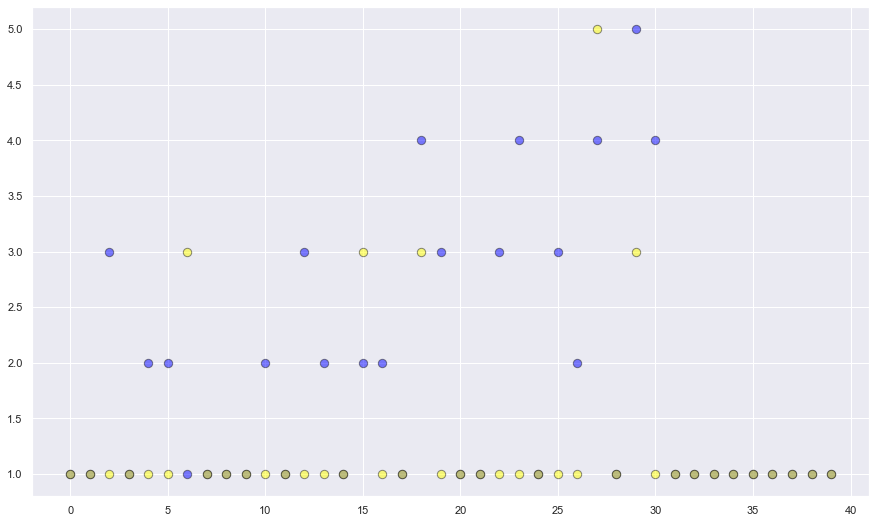

In [73]:
# Pedaco dos dados (40 deles) com o valor real (azul) e o predito (amarelo) pelo modelo (as bolinhas verde são os casos de acerto)
plt.scatter(students_por_restrict['index'][0:40], students_por_restrict['Walc_actual'][0:40], color='blue', alpha=0.5, edgecolors='k', s=70)
plt.scatter(students_por_restrict['index'][0:40], students_por_restrict['Walc_predicted'][0:40], color='yellow', alpha=0.5, edgecolors='k', s=70)
plt.show()

No final, o nosso modelo obteve um score de 0.393, que não é tão útil se não tolerarmos muitos erros. Mas corrobora com as correlações sureridas no trabalho.

### Regressão Logística com todos os atributos

Agora, vamos verificar se podemos melhorar essa regressão logística utilizando mais atributos fornecidos na base de dados, desta vez, consideramos todos os disponíveis (com excessão do consumo de álcool, que será previsto)

In [74]:
# Vamos usar o conjunto dos alunos de matematica como os dados de treino para o modelo

# Primeiramente executamos one hot encoding para os atributos categoricos com entragas em texto
students_math = pd.get_dummies(students_math)

y_treino = students_math[['Walc']].to_numpy()
y_treino = y_treino.reshape(y_treino.shape[0],)

#
students_math = students_math.drop(columns=['Dalc', 'Walc'])

X_treino = students_math.to_numpy()

print(students_math.columns)
students_math.head()

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [75]:
# Vamos usar o conjunto dos alunos de portugues como os dados de teste para o modelo

# Primeiramente executamos one hot encoding para os atributos categoricos com entragas em texto
students_por = pd.get_dummies(students_por)

y_pt = students_por[['Walc']].to_numpy()
y_pt = y_pt.reshape(y_pt.shape[0],)

students_por = students_por.drop(columns=['Dalc', 'Walc'])

X_pt = students_por.to_numpy()

print(students_por.columns)
students_por.head()

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


Agora fazemos a regressão propriamente dita

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_treino, y_treino)

students_por['Walc_actual'] = y_pt
students_por['Walc_predicted'] = clf.predict(X_pt)
students_por['index'] = students_por.index

C:\Users\diego\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Avaliação

O conjunto é avaliado utilizando-se os dados de teste (alunos de língua portuguesa)

In [77]:
clf.score(X_pt, y_pt)

0.4453004622496148

O score do modelo foi de aproximadamente 0.445

Para ter uma melhor noção das previsões retornadas pelo modelo, além de seus acertos e erros, plotamos um gráfico com as 40 primeiras instâncias de alunos dos conjunto de teste.

Pontos em <span style="color:blue">azul</span> representam os valores reais
<br />
Pontos em <span style="color:yellow">amarelo</span> representam os valores preditos pelo modelo
<br />
Pontos em <span style="color:green">verde</span> são os dois pontos anterires sobrepostos, ou seja, representa um caso em que o modelo acerta a previsão

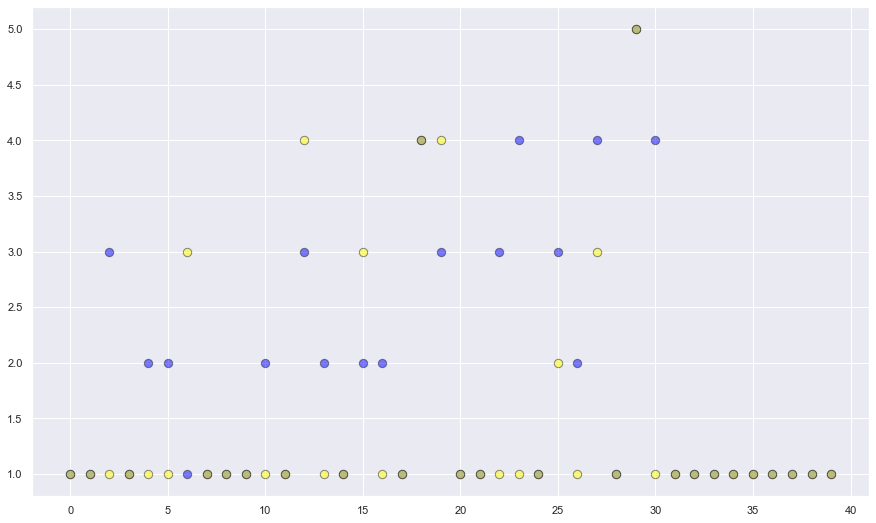

In [78]:
# Pedaco dos dados (40 deles) com o valor real (azul) e o predito (amarelo) pelo modelo (as bolinhas verde são os casos de acerto)
plt.scatter(students_por['index'][0:40], students_por['Walc_actual'][0:40], color='blue', alpha=0.5, edgecolors='k', s=70)
plt.scatter(students_por['index'][0:40], students_por['Walc_predicted'][0:40], color='yellow', alpha=0.5, edgecolors='k', s=70)
plt.show()

### Conclusão

No final, considerar mais atributos melhou nosso modelo, que passou de um score de 0.393 para 0.445, contudo, ainda não é muito útil se não tolerarmos muitos erros.